In [1]:
import math
import numpy
from src.arima import ARIMA
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import pylab
import csv
%matplotlib inline

/usr/local/lib/python2.7/dist-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [4]:
def load():
    data = []
    with open('data/sunspot.csv', 'rb') as f:
        reader = csv.reader(f)
        for row in reader:
            data.append(float(row[1]))
    return data

actual = load() 

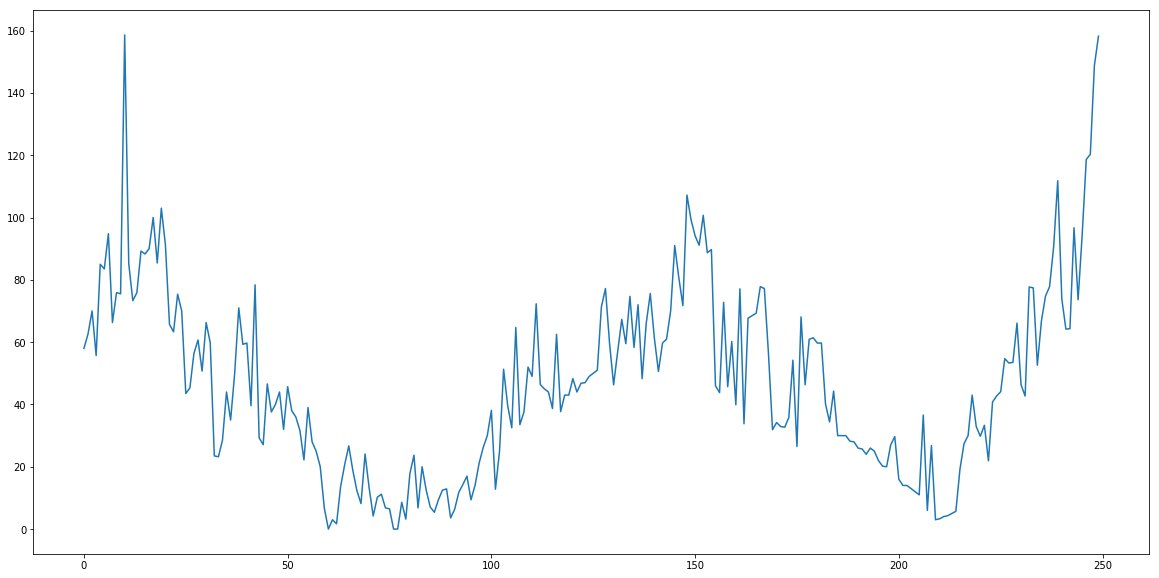

In [16]:
plt.figure(figsize=(20,10))
plt.plot(actual[0:250])

In [6]:
arima = ARIMA()
pred = arima.predict(actual)

/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/usr/local/lib/python2.7/dist-packages/statsmodels/base/model.py:496: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


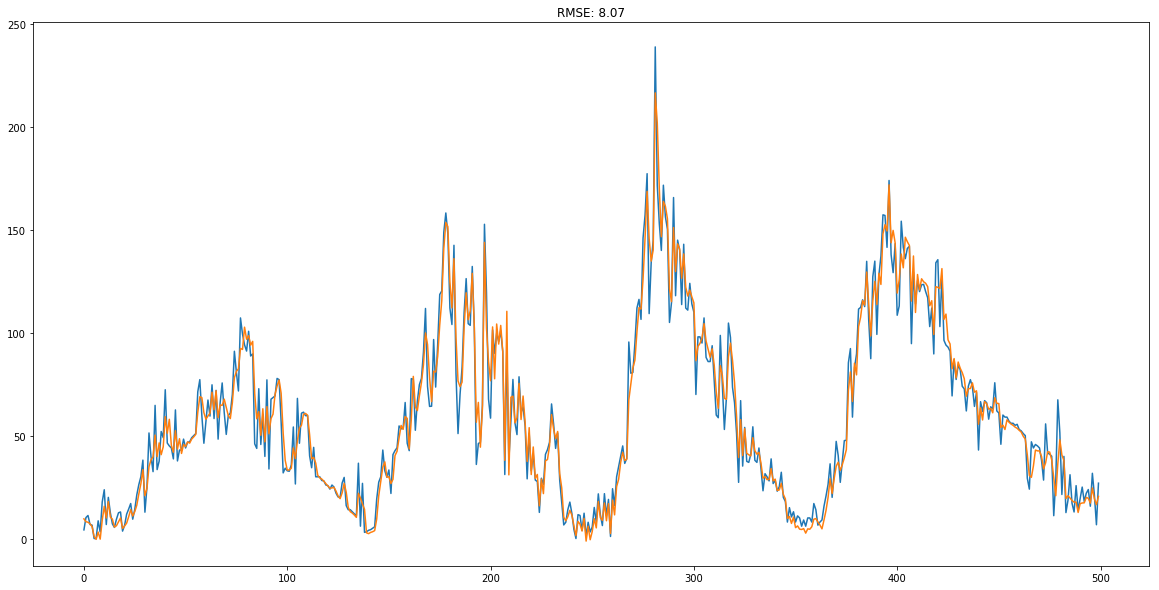

In [17]:
adjusted_actual = actual[71:-2]

samples = 500
plot_actual = adjusted_actual[0:samples]
plot_pred = pred[0:samples]

error = math.sqrt(mean_squared_error(plot_pred, plot_actual))

plt.figure(figsize=(20,10))
plt.title('RMSE: {:.2f}'.format(error))
plt.plot(plot_actual)
plt.plot(plot_pred)

In [21]:
m = numpy.mean(plot_actual)
s = numpy.var(plot_actual)
print(m, math.sqrt(s))

(58.936999999999998, 41.880998209211775)


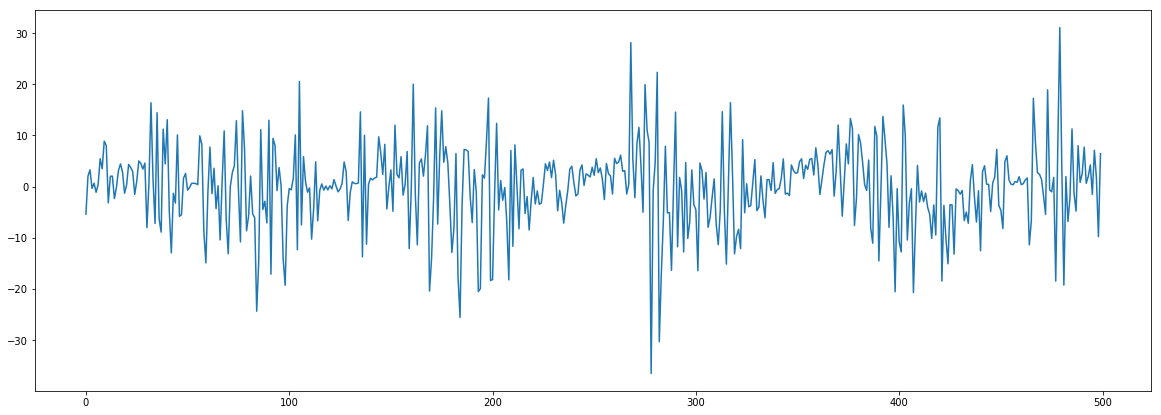

In [14]:
residual = []
for i in range(len(plot_actual)):
    val = plot_actual[i] - plot_pred[i][0]
    residual.append(val)

plt.figure(figsize=(20,7))
plt.plot(residual)

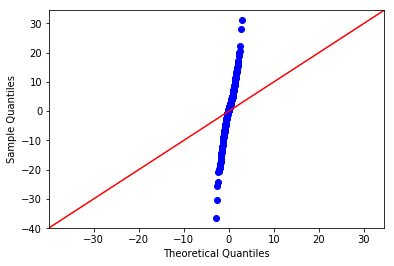

In [11]:
sm.qqplot(numpy.array(residual), line='45')
pylab.show()